# Continued....

<center><img src=https://miro.medium.com/max/3076/1*FIIGhzbuTo2vI62mFcbMTg.png>

# What is a Model Parameter?

---

A model parameter is a configuration variable that is internal to the model and whose value can be estimated from data.

> * They are required by the model when making predictions.

> * They values define the skill of the model on your problem.

> * They are estimated or learned from data.

> * They are often not set manually by the practitioner.

> * They are often saved as part of the learned model.

Parameters are key to machine learning algorithms. They are the part of the model that is learned from historical training data.

In classical machine learning literature, we may think of the model as the hypothesis and the parameters as the tailoring of the hypothesis to a specific set of data.

An example of model parameter:

> The coefficients in a linear regression or logistic regression.

# What is a Model Hyperparameter?

---

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

> * They are often used in processes to help estimate model parameters.

> * They are often specified by the practitioner.

> * They can often be set using heuristics.

> * They are often tuned for a given predictive modeling problem.

We cannot know the best value for a model hyperparameter on a given problem. We may use rules of thumb, copy values used on other problems, or search for the best value by trial and error.

When a machine learning algorithm is tuned for a specific problem, such as when you are using a grid search or a random search, then you are tuning the hyperparameters of the model or order to discover the parameters of the model that result in the most skillful predictions.

Some examples of model hyperparameters include:

> The learning rate for training a GBM.

> The L2 regulariation parameter $ \lambda $ for training a logistic regression.

# Cross Validation

---

<center><img src=https://miro.medium.com/max/677/1*qPMFLEbvc8QQf38Cf77wQg.png></center>

There are different types of Cross Validation Techniques but the overall concept remains the same,

> 1.To partition the data into a number of subsets

> 2.Hold out a set at a time and train the model on remaining set

> 3.Test model on hold out set

Major types of Cross Validation:

> * K-Fold Cross Validation

> * Stratified K-fold Cross Validation

### k-Fold Cross Validation

<center><img src=https://miro.medium.com/max/700/1*rgba1BIOUys7wQcXcL4U5A.png></center>

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.
If k=5 the dataset will be divided into 5 equal parts and the below process will run 5 times, each time with a different holdout set.
> 1. Take the group as a holdout or test data set
> 2. Take the remaining groups as a training data set
> 3. Fit a model on the training set and evaluate it on the test set
> 4. Retain the evaluation score and discard the model

At the end of the above process Summarize the skill of the model using the sample of model evaluation scores.

### Stratified k-Fold Cross Validation

<center><img src=https://miro.medium.com/max/700/1*D9OJZ-n0xh9d87i58WfMLQ.png></center>

Same as K-Fold Cross Validation, just a slight difference
The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.

<font color="red"> Food for thought: What should be the right choice for k?

In [5]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [6]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [7]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=111)

In [8]:
for train_index, test_index in cv.split(X_train, y_train):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1300 1346 1377 ... 7497 7498 7499] TEST: [   0    1    2 ... 1503 1504 1505]
TRAIN: [   0    1    2 ... 7497 7498 7499] TEST: [1300 1346 1377 ... 3016 3017 3018]
TRAIN: [   0    1    2 ... 7497 7498 7499] TEST: [2631 2669 2697 ... 4511 4512 4513]
TRAIN: [   0    1    2 ... 7497 7498 7499] TEST: [4090 4102 4119 ... 6005 6006 6007]
TRAIN: [   0    1    2 ... 6005 6006 6007] TEST: [5719 5749 5790 ... 7497 7498 7499]


In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
cv_results = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=cv, scoring='recall', n_jobs=-1)
cv_results

array([0.39583333, 0.3125    , 0.4893617 , 0.19148936, 0.42553191])

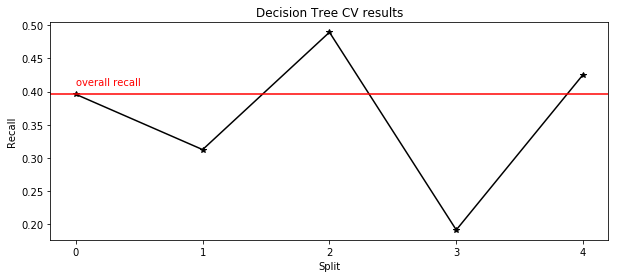

In [11]:
plt.figure(figsize=(10, 4))
pd.Series(cv_results).plot(marker="*", c="k")
plt.xticks(range(cv.get_n_splits()))
plt.xlabel('Split')
plt.ylabel('Recall')
plt.axhline(recall_score(y_train, clf.predict(X_train)), c='r')
plt.title('Decision Tree CV results')
plt.text(0, 0.41, 'overall recall', color='r')
plt.show()

## Hyperparameter tuning

---

In general, the process of tuning includes:

> * Define a model

> * Define the range of possible values for all hyperparameters

> * Define a method for sampling hyperparameter values

> * Define an evaluative criteria to judge the model

> * Define a cross-validation method

Now talking about sampling of hyperparameter values, there can be many ways such as:

> 1. **Manual Trial-and-error**

> 2. **Exhaustive search**

> 3. **Random search**

> 4. **Prior belief (bayesian optimization)**

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
%%time
param_grid = {
             'max_depth': np.arange(2, 11, 2), \
             'min_samples_split': np.arange(20, 56, 10), \
             'min_samples_leaf': np.arange(5, 20, 5)
            }

grid_search_results = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='recall', \
                                  iid=False, refit=True, n_jobs=-1, verbose=1)

grid_search_results.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.0s


Wall time: 15.5 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.0s finished


In [14]:
grid_search_results.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [15]:
grid_search_results.best_params_

{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}

In [16]:
grid_search_results.best_score_

0.3671985815602837

In [17]:
grid_search_results.cv_results_

{'mean_fit_time': array([0.02812243, 0.03124804, 0.03124681, 0.02812338, 0.03749709,
        0.02187309, 0.03437181, 0.02812419, 0.02499981, 0.02812366,
        0.02812343, 0.02779078, 0.05826564, 0.05714221, 0.04062166,
        0.04062247, 0.04687204, 0.05936909, 0.04687095, 0.03749714,
        0.02499843, 0.03437023, 0.03124881, 0.02499566, 0.03436909,
        0.03749952, 0.03436937, 0.03124537, 0.03749743, 0.03124843,
        0.03124681, 0.02812223, 0.02812333, 0.02499843, 0.02499862,
        0.02812386, 0.03124614, 0.03437324, 0.03437276, 0.03124752,
        0.02812338, 0.03124747, 0.0312479 , 0.02812338, 0.0281229 ,
        0.02499828, 0.03124752, 0.0281219 , 0.03124719, 0.02499824,
        0.03124747, 0.03749709, 0.02499704, 0.02187319, 0.01874852,
        0.02187252, 0.01874762, 0.01562433, 0.02187347, 0.01874819]),
 'mean_score_time': array([0.00624847, 0.00624967, 0.01249895, 0.00937471, 0.        ,
        0.00937414, 0.00624995, 0.00624866, 0.00312457, 0.00624924,
        0.

In [18]:
grid_search_results.cv_results_['mean_test_score']

array([0.26152482, 0.26152482, 0.26152482, 0.26152482, 0.26152482,
       0.26152482, 0.26152482, 0.26152482, 0.26152482, 0.26152482,
       0.26152482, 0.26152482, 0.31666667, 0.31666667, 0.31666667,
       0.33785461, 0.27473404, 0.27473404, 0.28324468, 0.32960993,
       0.31241135, 0.31241135, 0.31241135, 0.36294326, 0.31241135,
       0.29539007, 0.32083333, 0.3462766 , 0.30443262, 0.28324468,
       0.28324468, 0.33386525, 0.28741135, 0.28741135, 0.31241135,
       0.36719858, 0.30398936, 0.29964539, 0.30806738, 0.34202128,
       0.30443262, 0.29175532, 0.28324468, 0.33386525, 0.28741135,
       0.28741135, 0.31241135, 0.36719858, 0.29973404, 0.30390071,
       0.3123227 , 0.3462766 , 0.30859929, 0.28324468, 0.28324468,
       0.33386525, 0.28741135, 0.28741135, 0.31241135, 0.36719858])

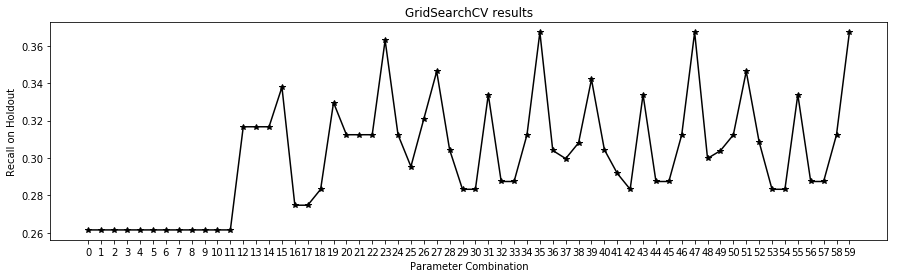

In [19]:
plt.figure(figsize=(15, 4))
pd.Series(grid_search_results.cv_results_['mean_test_score']).plot(marker="*", c="k")
plt.xticks(range(60))
plt.xlabel('Parameter Combination')
plt.ylabel('Recall on Holdout')
plt.title('GridSearchCV results')
plt.show()

In [20]:
grid_search_results.cv_results_['mean_test_score'].argmax()

35

In [21]:
grid_search_results.cv_results_['params'][35]

{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}

### Random search

---

Random search differs from grid search in that we longer provide a discrete set of values to explore for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values may be randomly sampled.

One of the main theoretical backings to motivate the use of random search in place of grid search is the fact that for most cases, hyperparameters are not equally important.

In [22]:
from scipy.stats import randint
randint(0,10)

In [23]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
             'max_depth': randint(2,11), \
             'min_samples_split': randint(20,40), \
             'min_samples_leaf': randint(5,19)
            }

random_search_results = RandomizedSearchCV(estimator=clf, param_distributions=param_distributions, cv=cv, \
                                           scoring='recall', n_iter=50, iid=False, \
                                           refit=True, n_jobs=-1, verbose=1, random_state=123)

random_search_results.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.8s finished


Wall time: 16.7 s


In [24]:
random_search_results.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
random_search_results.best_params_

{'max_depth': 3, 'min_samples_leaf': 14, 'min_samples_split': 20}

In [26]:
random_search_results.best_score_

0.3671985815602837

In [27]:
random_search_results.predict_proba(X_test)

array([[0.99738861, 0.00261139],
       [0.99738861, 0.00261139],
       [0.99738861, 0.00261139],
       ...,
       [0.99738861, 0.00261139],
       [0.99738861, 0.00261139],
       [0.9484375 , 0.0515625 ]])

In [28]:
import pickle
pickle.dump(random_search_results, open('./export/best_model_from_random_search.pkl', 'wb'))

In [29]:
model_trained_earlier = pd.read_pickle('./export/best_model_from_random_search.pkl')

In [30]:
random_search_results  #== model_trained_earlier

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=111, shuffle=False),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          fit_params=None, iid=False, n_iter=50, n_jobs=-1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002070B353470>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002070B30CBA8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002070B3071D0>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='recall', verbose=1)

In [31]:
model_trained_earlier

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=111, shuffle=False),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          fit_params=None, iid=False, n_iter=50, n_jobs=-1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002077B2BB400>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002070B21C160>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002070B21CC50>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='recall', verbose=1)

### Bayesian optimization

---

The previous two methods performed individual experiments building models with various hyperparameter values and recording the model performance for each. Because each experiment was performed in isolation, it's very easy to parallelize this process. However, because each experiment was performed in isolation, we're not able to use the information from one experiment to improve the next experiment. Bayesian optimization belongs to a class of sequential model-based optimization (SMBO) algorithms that allow for one to use the results of our previous iteration to improve our sampling method of the next experiment.

We'll initially define a model constructed with hyperparameters λ which, after training, is scored v according to some evaluation metric. Next, we use the previously evaluated hyperparameter values to compute a posterior expectation of the hyperparameter space. We can then choose the optimal hyperparameter values according to this posterior expectation as our next model candidate. We iteratively repeat this process until converging to an optimum.

In [32]:
########################################### HYPEROPT ###################################################
# http://hyperopt.github.io/hyperopt/
########################################### OPTUNA ###################################################
# https://optuna.org/